## Word embedding

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('posts.json')

In [3]:
df

,descripcion,fecha
0,👀 DataRobot has some big product news. You won...,13-03-2023
1,We are delighted to co-host an executive forum...,13-03-2023
2,🔑 As you grow and optimize your business with ...,13-03-2023
3,⏰ We are going live in one hour! Join Brent Hi...,13-03-2023
4,Another awesome breakout session not to be mis...,13-03-2023
...,...,...
196,Remember how Dr. Heinz Doofenshmirtz could nev...,29-03-2023
197,Are you a machine learning enthusiast looking ...,29-03-2023
198,Why did the junior developer cross the road?\n...,29-03-2023
199,Experience the Power of AI Angle Tracking for ...,29-03-2023


In [4]:
corpus=df["descripcion"].values.tolist()
print(corpus)

['👀 DataRobot has some big product news. You won’t want to miss one of the most exciting product launches in our history! Learn how you can drive business value with the new and exciting capabilities in the DataRobot AI Platform. Register today. #AIVisiontoValue\n\nhttps://bit.ly/412fyXR', 'We are delighted to co-host an executive forum with stc on March 14, bringing together #AI experts to discuss how to accelerate and drive value from AI.\n\nRegister now ⬇️\nhttps://lnkd.in/gbUXHjCk\n', '🔑 As you grow and optimize your business with #AI, it is key that you deliver models that you can trust and defend over time. Join the March 16 Breakout Session with Brian Bell Jr. to learn more about the new governance capabilities in the DataRobot AI Platform. Register today:\n\nhttps://bit.ly/412fyXR\n\n#AIVisiontoValue\n', '⏰ We are going live in one hour! Join Brent Hinks, Senior Pre-Sales Data Scientist, for a discussion on how to execute an end-to-end data science workflow on DataRobot orchest

## Tokenizacion sin lemattizer 

In [5]:
import nltk
nltk.download('punkt')


corpus_tok = [nltk.word_tokenize(sent) for sent in corpus]
corpus_tok

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\afrincon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['👀',
  'DataRobot',
  'has',
  'some',
  'big',
  'product',
  'news',
  '.',
  'You',
  'won',
  '’',
  't',
  'want',
  'to',
  'miss',
  'one',
  'of',
  'the',
  'most',
  'exciting',
  'product',
  'launches',
  'in',
  'our',
  'history',
  '!',
  'Learn',
  'how',
  'you',
  'can',
  'drive',
  'business',
  'value',
  'with',
  'the',
  'new',
  'and',
  'exciting',
  'capabilities',
  'in',
  'the',
  'DataRobot',
  'AI',
  'Platform',
  '.',
  'Register',
  'today',
  '.',
  '#',
  'AIVisiontoValue',
  'https',
  ':',
  '//bit.ly/412fyXR'],
 ['We',
  'are',
  'delighted',
  'to',
  'co-host',
  'an',
  'executive',
  'forum',
  'with',
  'stc',
  'on',
  'March',
  '14',
  ',',
  'bringing',
  'together',
  '#',
  'AI',
  'experts',
  'to',
  'discuss',
  'how',
  'to',
  'accelerate',
  'and',
  'drive',
  'value',
  'from',
  'AI',
  '.',
  'Register',
  'now',
  '⬇️',
  'https',
  ':',
  '//lnkd.in/gbUXHjCk'],
 ['🔑',
  'As',
  'you',
  'grow',
  'and',
  'optimize',
  'y

In [32]:
words = ['algorithm', 'bias', 'big data', 'coding', 'computer', 'cybersecurity', 'data', 'digital divide', 'discrimination', 'ethics', 'gender', 'internet', 'machine learning', 'privacy', 'programming', 'robot', 'software', 'technology']
bias_words = ['ageism', 'ableism', 'racism', 'sexism', 'heterosexism', 'homophobia', 'transphobia', 'colorism', 'lookism', 'sizeism', 'classism', 'xenophobia']
words2 = ['Manpower', 'Chairman', 'Businessman', 'Freshman', 'Journeyman', 'Salesman', 'Mankind', 'Right-hand man', 'Workmanlike', 'Policeman', 'Fireman', 'Postman', 'Forefathers', 'Craftsman', 'Repairman', 'Mansplain', 'He', "She","him","her", 'Artificial Intelligence']
total_words=list(set(words+bias_words+words2))
total_words

['Craftsman',
 'privacy',
 'Manpower',
 'ageism',
 'Businessman',
 'Artificial Intelligence',
 'xenophobia',
 'ethics',
 'He',
 'Mansplain',
 'coding',
 'robot',
 'software',
 'sizeism',
 'She',
 'her',
 'gender',
 'heterosexism',
 'classism',
 'racism',
 'data',
 'Forefathers',
 'him',
 'big data',
 'computer',
 'Journeyman',
 'Repairman',
 'ableism',
 'machine learning',
 'algorithm',
 'Chairman',
 'Salesman',
 'Freshman',
 'cybersecurity',
 'bias',
 'programming',
 'lookism',
 'Mankind',
 'colorism',
 'Workmanlike',
 'technology',
 'Fireman',
 'internet',
 'Postman',
 'transphobia',
 'digital divide',
 'discrimination',
 'Policeman',
 'homophobia',
 'sexism',
 'Right-hand man']

In [14]:
from gensim.models import Word2Vec

# Define los parámetros de tu modelo personalizado
vector_size = 100
window_size = 5

# Construye el vocabulario de tu modelo utilizando las palabras del corpus tokenizado
model = Word2Vec(corpus_tok, vector_size=vector_size, window=window_size, min_count=1)

# Entrena el modelo Word2Vec con el corpus tokenizado
model.train(corpus_tok, total_examples=len(corpus_tok), epochs=500)

# Guarda el modelo entrenado para su uso posterior
model.save("mi_modelo_word2vec.model")

In [15]:
vector = model.wv['nlp']
vector

array([-0.02837121,  0.37678272, -0.19217403,  0.2902139 ,  0.07409897,
       -2.089096  , -1.0559781 ,  1.2185838 , -0.5002029 , -0.3532492 ,
        0.02190407, -2.3718307 , -0.5316062 ,  0.70237494,  0.34798822,
       -0.07089762, -0.3910927 , -0.45183125, -0.08412509, -1.372717  ,
        1.093181  ,  0.7143893 ,  0.24612868, -0.44767693,  0.20349084,
       -0.51100564, -1.0097392 , -0.4590947 , -0.43028983, -0.01221357,
       -0.14977013,  0.7664253 , -0.24043395, -0.6132971 ,  0.29054725,
        1.4068178 , -0.54044956, -1.5279832 , -1.2616669 , -1.4617196 ,
       -0.25434196, -0.00280593, -0.63458323, -1.4723097 ,  0.30573916,
        1.106713  , -0.2408297 ,  0.37491778, -0.6723165 ,  1.2334467 ,
        0.06215218, -1.1322851 , -1.2221318 , -0.9915966 , -0.47916612,
       -0.39176148,  2.0842466 , -0.44892672, -0.96261626,  0.2320155 ,
       -0.08784163, -0.5370347 ,  0.21436697, -0.19301276, -0.42842123,
        1.418496  ,  0.8579103 ,  0.7065358 , -1.7650782 ,  1.50

In [16]:
similares = model.wv.most_similar('chatbot')
similares

[('nlp', 0.992624819278717),
 ('openai', 0.9880776405334473),
 ('aiplane', 0.9821075201034546),
 ('aiplanet', 0.9670093655586243),
 ('chatgpt', 0.9600342512130737),
 ('dataclassification', 0.9079221487045288),
 ('unsupervisedlearning', 0.8995711803436279),
 ('quora', 0.8912971019744873),
 ('cheatsheet', 0.8878978490829468),
 ('deepmind', 0.8829572200775146)]

In [17]:
similitud = model.wv.similarity('chatbot', 'nlp')
similitud

0.99262476

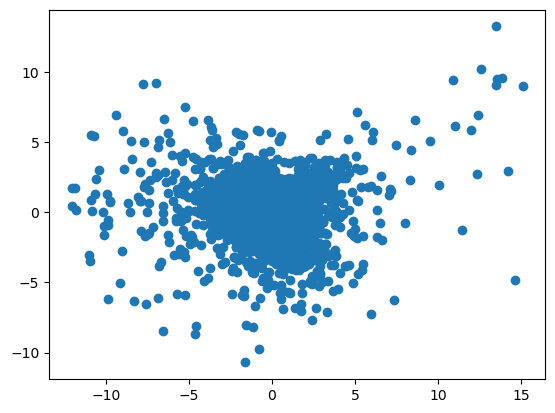

In [18]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# cargar modelo entrenado
model = Word2Vec.load("mi_modelo_word2vec.model")

# obtener vectores de palabras entrenados por Word2Vec
word_vectors = model.wv.vectors

# aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(word_vectors)

# graficar los componentes principales
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.show()


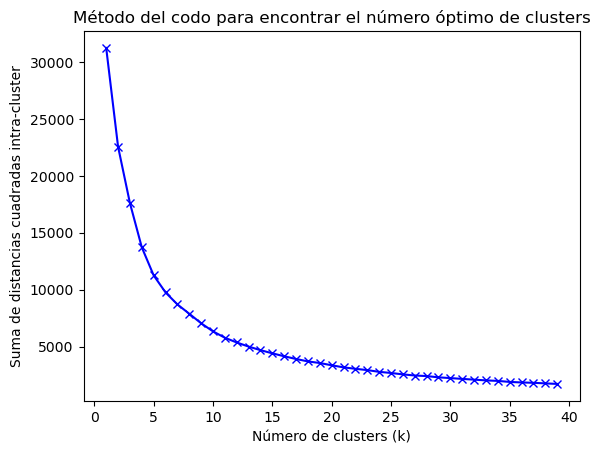

In [23]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# crear una lista vacía para almacenar las sumas de las distancias cuadradas intra-cluster
sum_of_squared_distances = []

# realizar k-means clustering para diferentes valores de k
K = range(1, 40)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(principal_components)
    sum_of_squared_distances.append(k_means.inertia_)

# graficar la suma de las distancias cuadradas intra-cluster para diferentes valores de k
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de distancias cuadradas intra-cluster')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.show()


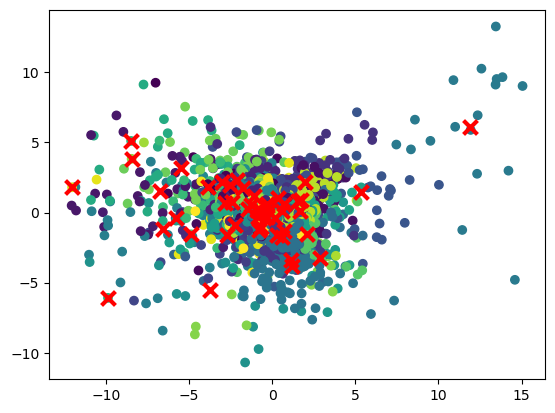

In [28]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# cargar modelo entrenado
model = Word2Vec.load("mi_modelo_word2vec.model")

# obtener vectores de palabras entrenados por Word2Vec
word_vectors = model.wv.vectors

# aplicar PCA
pca = PCA(n_components=100)
principal_components = pca.fit_transform(word_vectors)

# aplicar k-means
kmeans = KMeans(n_clusters=50, random_state=0)
kmeans.fit(principal_components)

# graficar los resultados de k-means
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, linewidths=3, color='r')
plt.show()


In [29]:
# obtener las etiquetas de los clusters para cada punto en el espacio 2D producido por PCA
labels = kmeans.predict(principal_components)

# crear un diccionario para almacenar las palabras por cluster
clusters = {}

# agregar cada palabra al cluster correspondiente
for i, word in enumerate(model.wv.index_to_key):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(word)

# imprimir palabras por cluster
for cluster, words in clusters.items():
    print(f"Cluster {cluster}: {words}")



Cluster 21: ['#', 'in', 'AI', 'for', 'on', 'at', 'more', 'our', 'from', 'Join', 'Register', 'about', 'GTC23', 'DataRobot', 'new', 'Learn', 'NVIDIA', 'event', 'what', 'some', 'You', 'Platform', 'tomorrow', 'Snowflake', '16', 'See', 'virtual', 'capabilities', 'watch', 'big', 'scale', 'product', '9.0']
Cluster 12: [',', 'blog', 'CTO', 'Inc.', 'Director', 'Schmidt', 'Michael', 'SAP', 'Mahmoudian', 'Product', 'Hub', 'generative', 'Officer', 'Chief', 'Haniyeh', 'Ph.D', 'Head', 'Marketing', 'Veeraraghavan', 'Venky', 'CPO', 'Jordan', 'VP', 'Bharat', 'Sandhu', 'enterprise', 'Markham', 'Success', 'Azure', 'Divakaruni', 'Dom', 'Bunge', 'Luke', 'Polaris', 'guest', 'National', 'Sathi', 'innovators', 'social', 'Management', 'Grabs', 'Torsten', 'Limited', 'SEVP', 'Mahajan', 'Vivek', 'plc', 'Hidalgo', 'Sánchez', 'Belén', 'very', 'Ethicist', 'Meet', 'Ram', 'Thilak', 'Inchcape', 'Dock', 'Managing', 'Aditya', 'Lisa', 'Richardson-Aguilar', 'Schuren', 'NTT', 'Leader', 'Docomo', 'Vodafone', 'Singtel', 'Jay'